### Importing Libraries

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

!pip install catboost
from catboost import CatBoostClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Loading and reading the dataset.

In [ ]:
df = pd.read_csv('/content/waterQuality1.csv')
df.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [ ]:
df.describe()

,aluminium,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
count,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000
mean,0.666158,0.161445,1.567715,0.042806,2.176831,0.247226,0.805857,0.771565,0.319665,0.328583,0.099450,9.818822,1.329961,0.005194,16.460299,2.920548,0.049685,0.147781,0.044673
std,1.265145,0.252590,1.216091,0.036049,2.567027,0.270640,0.653539,0.435373,0.329485,0.378096,0.058172,5.541331,0.573219,0.002967,17.687474,2.323009,0.028770,0.143551,0.026904
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.405000,0.000000,0.002000,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000
50%,0.070000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,0.008000,0.102000,9.930000,1.420000,0.005000,7.740000,2.410000,0.050000,0.080000,0.050000
75%,0.280000,0.100000,2.480000,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,0.700000,0.151000,14.610000,1.760000,0.008000,29.480000,4.670000,0.070000,0.240000,0.070000
max,5.050000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,1.000000,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [ ]:
# Looking at the target variable
df['is_safe'].value_counts()

0        7084
1         912
#NUM!       3
Name: is_safe, dtype: int64

In [ ]:
df.shape

(7999, 21)

In [ ]:
remove = df.index[df['is_safe']=='#NUM!'].tolist()
remove

[7551, 7568, 7890]

In [ ]:
df.drop([7551, 7568, 7890], axis=0, inplace=True)
df.shape

(7996, 21)

In [ ]:
df['is_safe'] = df['is_safe'].apply(lambda x: int(x))
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7996 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7996 non-null   float64
 1   ammonia      7996 non-null   object 
 2   arsenic      7996 non-null   float64
 3   barium       7996 non-null   float64
 4   cadmium      7996 non-null   float64
 5   chloramine   7996 non-null   float64
 6   chromium     7996 non-null   float64
 7   copper       7996 non-null   float64
 8   flouride     7996 non-null   float64
 9   bacteria     7996 non-null   float64
 10  viruses      7996 non-null   float64
 11  lead         7996 non-null   float64
 12  nitrates     7996 non-null   float64
 13  nitrites     7996 non-null   float64
 14  mercury      7996 non-null   float64
 15  perchlorate  7996 non-null   float64
 16  radium       7996 non-null   float64
 17  selenium     7996 non-null   float64
 18  silver       7996 non-null   float64
 19  uraniu

In [ ]:
df.ammonia = df.ammonia.apply(lambda x: float(x))
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7996 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7996 non-null   float64
 1   ammonia      7996 non-null   float64
 2   arsenic      7996 non-null   float64
 3   barium       7996 non-null   float64
 4   cadmium      7996 non-null   float64
 5   chloramine   7996 non-null   float64
 6   chromium     7996 non-null   float64
 7   copper       7996 non-null   float64
 8   flouride     7996 non-null   float64
 9   bacteria     7996 non-null   float64
 10  viruses      7996 non-null   float64
 11  lead         7996 non-null   float64
 12  nitrates     7996 non-null   float64
 13  nitrites     7996 non-null   float64
 14  mercury      7996 non-null   float64
 15  perchlorate  7996 non-null   float64
 16  radium       7996 non-null   float64
 17  selenium     7996 non-null   float64
 18  silver       7996 non-null   float64
 19  uraniu

In [ ]:
df.isnull().sum()

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

In [ ]:
df.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


### Exploratory Data Analysis (EDA)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe23df83dd0>,
      dtype=object)

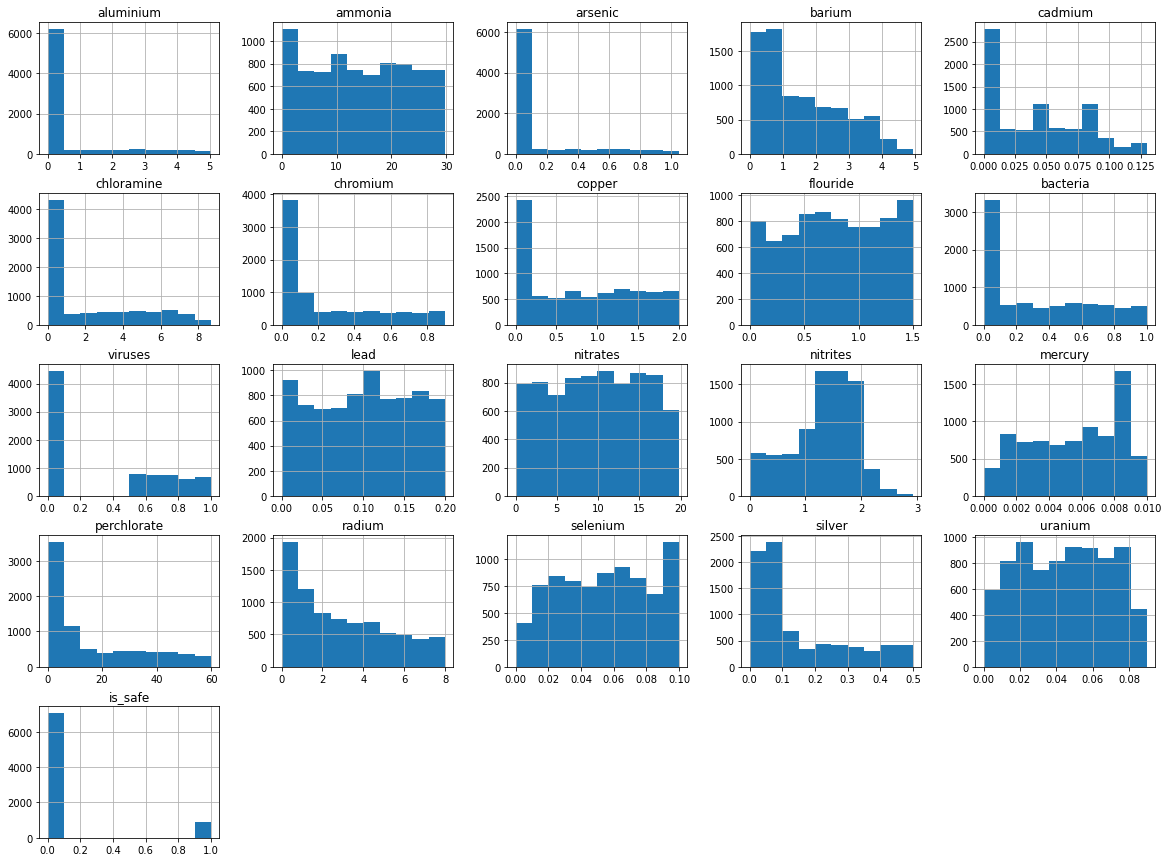

In [ ]:
df.hist(figsize=(20, 15), bins=10)

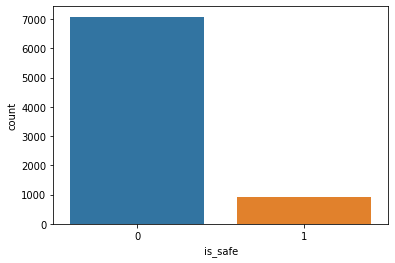

In [ ]:
sns.countplot(data=df , x='is_safe')

In [ ]:
df['is_safe'].value_counts()

0    7084
1     912
Name: is_safe, dtype: int64

In [ ]:
# Imbalanced data. It is best to balance the data before it is being trained.
# The data will be balanced using Smote

features = df.drop('is_safe', axis=1)
label = df.is_safe

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
feat_res, label_res = sm.fit_resample(features, label)
feat_res.shape ,label_res.shape

((14168, 20), (14168,))

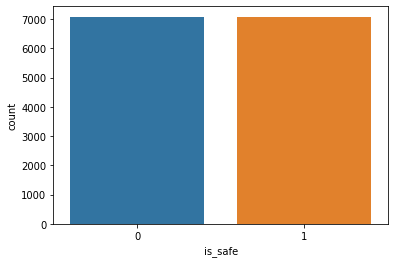

In [ ]:
sns.countplot(x=label_res)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe23d160d10>,
      dtype=object)

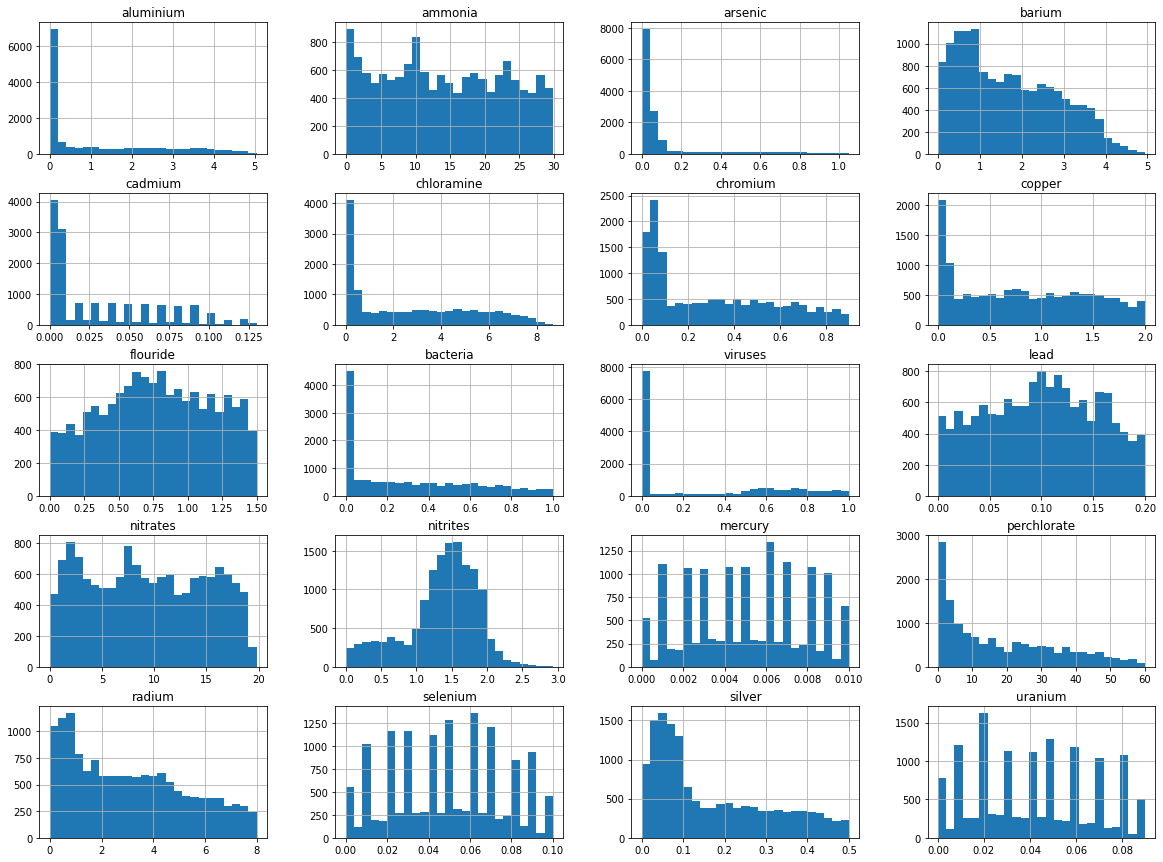

In [ ]:
feat_res.hist(figsize=(20, 15), bins=25)

### Preprocessing

#### Checking for Outliers

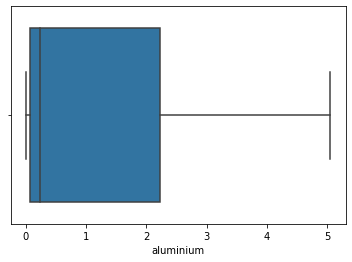

In [ ]:
sns.boxplot(x='aluminium', data=feat_res)

In [ ]:
# Doesn't seem like there's an outlier there, but it's not balanced.

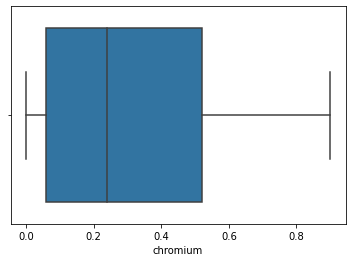

In [ ]:
sns.boxplot(x='chromium', data=feat_res)

In [ ]:
# Chromium is almost balanced(distributed) and have no outlier.

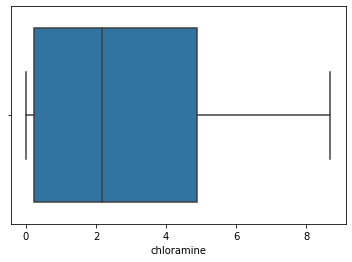

In [ ]:
sns.boxplot(x='chloramine', data=feat_res)

In [ ]:
# chloramine have no outliers like the others

In [ ]:
feat_res.arsenic.describe()

count    14168.000000
mean         0.123979
std          0.214358
min          0.000000
25%          0.020000
50%          0.040000
75%          0.080000
max          1.050000
Name: arsenic, dtype: float64

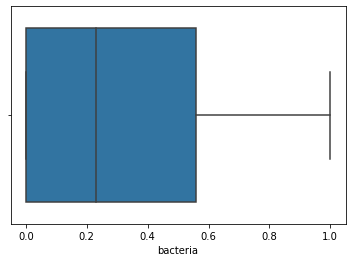

In [ ]:
sns.boxplot(x='bacteria', data=feat_res)

In [ ]:
# Bacteria seem not to have outliers, but it's skewed.

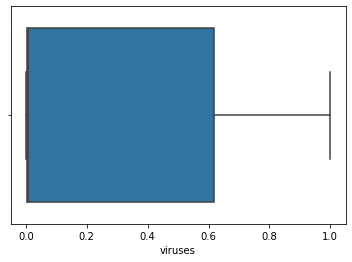

In [ ]:
sns.boxplot(x='viruses', data=feat_res)

In [ ]:
# Viruses seems to also have no outliers but it is also skewed.

Since it is only arsenic that seem to have  outliers, it will be left the way it is. Removal of its outliers can lead to others having outliers then increasing the numbers of outliers.

#### checking for correlation

In [ ]:
combined = feat_res.copy()
combined['is_safe'] = label_res

In [ ]:
corr = combined.corr()
corr['is_safe'].sort_values(ascending=False)

is_safe        1.000000
aluminium      0.447779
chromium       0.288599
chloramine     0.287464
silver         0.162616
barium         0.145280
perchlorate    0.126216
radium         0.102337
nitrites       0.077885
copper         0.048151
flouride       0.006873
lead          -0.011314
ammonia       -0.035394
bacteria      -0.041550
selenium      -0.052613
mercury       -0.068074
nitrates      -0.107761
uranium       -0.143575
viruses       -0.172260
arsenic       -0.227103
cadmium       -0.424757
Name: is_safe, dtype: float64

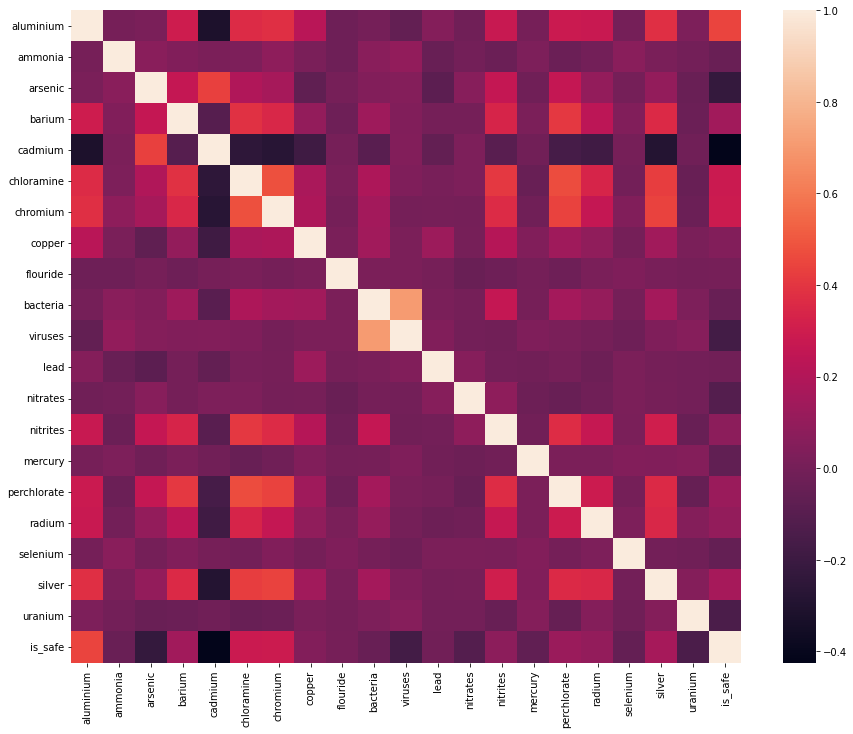

In [ ]:
plt.figure(figsize=(15,12))

sns.heatmap(corr)

### Standardizing

In [ ]:
scaler = StandardScaler()

feat = scaler.fit_transform(feat_res)
feat[:1]

array([[ 0.33638428, -0.56722662, -0.39178206,  0.99972172, -0.72739709,
        -0.94424385,  1.96433373, -1.08106809, -1.80499355, -0.35930511,
        -0.81472809, -0.84178287,  1.2106675 , -0.45277648,  0.70430714,
         1.20230742,  1.65017643,  1.17283212,  1.24415631, -0.86640305]])

In [ ]:
# Splitting the data to train, vaidation and test sets

train_feat, test_feat, train_label, test_label = train_test_split(feat, label_res, test_size=0.2, random_state=42)
train_feat, val_feat, train_label, val_label = train_test_split(train_feat, train_label, test_size=0.2, random_state=42)

train_feat.shape, train_label.shape, val_feat.shape, val_label.shape, test_feat.shape, test_label.shape

((9067, 20), (9067,), (2267, 20), (2267,), (2834, 20), (2834,))

### Modelling with Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
log_res = LogisticRegression()
log_res.fit(train_feat, train_label)
pred = log_res.predict(val_feat)
accuracy = accuracy_score(val_label, pred)
print(accuracy)

0.7953242170269078


In [ ]:
print(classification_report(val_label, pred))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80      1135
           1       0.80      0.78      0.79      1132

    accuracy                           0.80      2267
   macro avg       0.80      0.80      0.80      2267
weighted avg       0.80      0.80      0.80      2267



In [ ]:
confusion_matrix(val_label, pred)

array([[916, 219],
       [245, 887]])

In [ ]:
def plot_confusion_matrix(true, pred):
    from sklearn.metrics import confusion_matrix
    confusion_matrix = confusion_matrix(true, pred, labels=[1, 0])

    import seaborn as sns; sns.set()
    import matplotlib.pyplot as plt

    cm_df = pd.DataFrame(confusion_matrix,
                 index = ['1', '0'], 
                 columns = ['1', '0'])
    ax = sns.heatmap(cm_df, fmt = 'd' ,annot=True)

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('Confusion Matrix')
    plt.show()

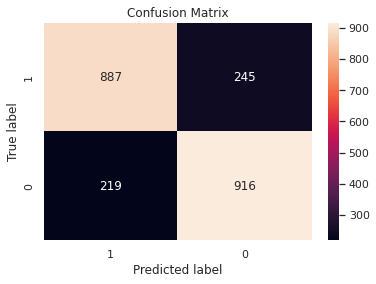

In [ ]:
plot_confusion_matrix(val_label, pred)

In [ ]:
# Predicting the test set
test_pred = log_res.predict(test_feat)
print(classification_report(test_label, test_pred))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81      1420
           1       0.81      0.80      0.80      1414

    accuracy                           0.81      2834
   macro avg       0.81      0.81      0.81      2834
weighted avg       0.81      0.81      0.81      2834



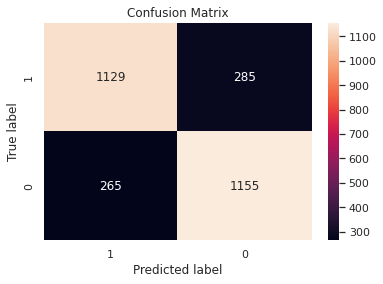

In [ ]:
plot_confusion_matrix(test_label, test_pred)

#### Trying with Random Forest Classifier, GradientBoostingClassifier and the CatBoostClassifier

In [ ]:
# RandomForest

rf_clf = RandomForestClassifier()
rf_clf.fit(train_feat, train_label)
pred = rf_clf.predict(val_feat)
accuracy = accuracy_score(val_label, pred)
print(accuracy)

0.9752977503308337


In [ ]:
print(classification_report(val_label, pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1135
           1       0.97      0.98      0.98      1132

    accuracy                           0.98      2267
   macro avg       0.98      0.98      0.98      2267
weighted avg       0.98      0.98      0.98      2267



In [ ]:
confusion_matrix(val_label, pred)

array([[1103,   32],
       [  24, 1108]])

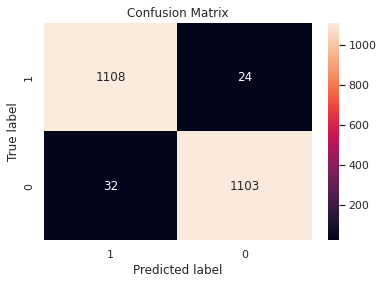

In [ ]:
plot_confusion_matrix(val_label, pred)

In [ ]:
# Predicting the test set
test_pred = rf_clf.predict(test_feat)
print(classification_report(test_label, test_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1420
           1       0.97      0.99      0.98      1414

    accuracy                           0.98      2834
   macro avg       0.98      0.98      0.98      2834
weighted avg       0.98      0.98      0.98      2834



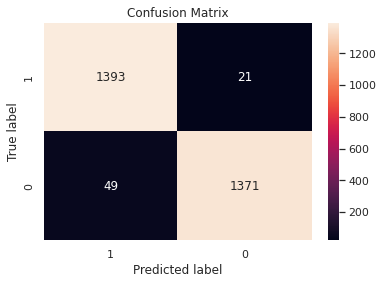

In [ ]:
plot_confusion_matrix(test_label, test_pred)

In [ ]:
# Cat boost Classifier
cat_clf = CatBoostClassifier()
cat_clf.fit(train_feat, train_label)
pred = cat_clf.predict(val_feat)
accuracy = accuracy_score(val_label, pred)
print(accuracy)

Learning rate set to 0.02641
0:	learn: 0.6679369	total: 70.3ms	remaining: 1m 10s
1:	learn: 0.6446559	total: 98.2ms	remaining: 49s
2:	learn: 0.6224443	total: 118ms	remaining: 39.4s
3:	learn: 0.6060350	total: 154ms	remaining: 38.4s
4:	learn: 0.5864060	total: 190ms	remaining: 37.8s
5:	learn: 0.5722859	total: 215ms	remaining: 35.5s
6:	learn: 0.5577915	total: 235ms	remaining: 33.3s
7:	learn: 0.5412367	total: 257ms	remaining: 31.9s
8:	learn: 0.5271696	total: 277ms	remaining: 30.5s
9:	learn: 0.5119974	total: 298ms	remaining: 29.5s
10:	learn: 0.4968607	total: 326ms	remaining: 29.4s
11:	learn: 0.4832549	total: 379ms	remaining: 31.2s
12:	learn: 0.4698106	total: 420ms	remaining: 31.9s
13:	learn: 0.4584861	total: 447ms	remaining: 31.4s
14:	learn: 0.4475557	total: 471ms	remaining: 31s
15:	learn: 0.4376751	total: 490ms	remaining: 30.1s
16:	learn: 0.4280120	total: 510ms	remaining: 29.5s
17:	learn: 0.4199638	total: 537ms	remaining: 29.3s
18:	learn: 0.4117921	total: 561ms	remaining: 29s
19:	learn: 0.40

In [ ]:
print(classification_report(val_label, pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1135
           1       0.98      0.99      0.98      1132

    accuracy                           0.98      2267
   macro avg       0.98      0.98      0.98      2267
weighted avg       0.98      0.98      0.98      2267



In [ ]:
confusion_matrix(val_label, pred)

array([[1110,   25],
       [  12, 1120]])

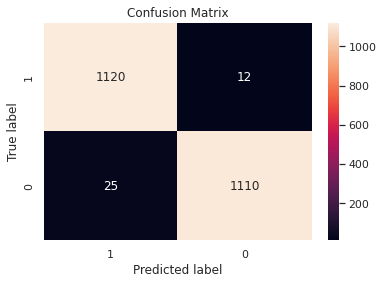

In [ ]:
plot_confusion_matrix(val_label, pred)

In [ ]:
# Predicting the test set
test_pred = cat_clf.predict(test_feat)
print(classification_report(test_label, test_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1420
           1       0.98      0.99      0.98      1414

    accuracy                           0.98      2834
   macro avg       0.98      0.98      0.98      2834
weighted avg       0.98      0.98      0.98      2834



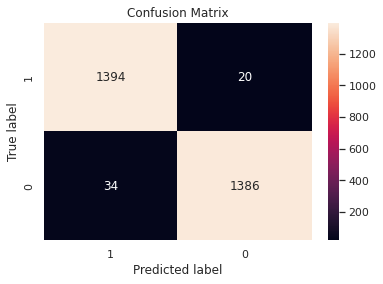

In [ ]:
plot_confusion_matrix(test_label, test_pred)

In [ ]:
# GradientBoosting

gb_clf = GradientBoostingClassifier()
gb_clf.fit(train_feat, train_label)
pred = gb_clf.predict(val_feat)
accuracy = accuracy_score(val_label, pred)
print(accuracy)

0.9633877370974857


In [ ]:
print(classification_report(val_label, pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1135
           1       0.96      0.97      0.96      1132

    accuracy                           0.96      2267
   macro avg       0.96      0.96      0.96      2267
weighted avg       0.96      0.96      0.96      2267



In [ ]:
confusion_matrix(val_label, pred)

array([[1088,   47],
       [  36, 1096]])

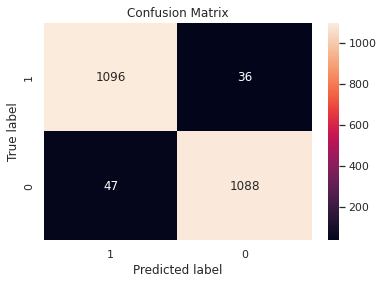

In [ ]:
plot_confusion_matrix(val_label, pred)

In [ ]:
# Predicting the test set
test_pred = gb_clf.predict(test_feat)
print(classification_report(test_label, test_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1420
           1       0.95      0.97      0.96      1414

    accuracy                           0.96      2834
   macro avg       0.96      0.96      0.96      2834
weighted avg       0.96      0.96      0.96      2834



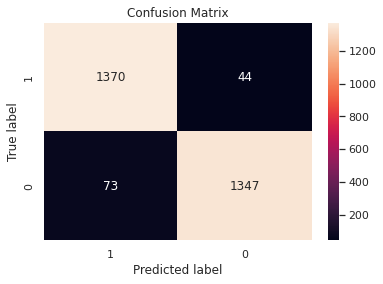

In [ ]:
plot_confusion_matrix(test_label, test_pred)

In [ ]:
print('The best model is CatBoostClassifier')

The best model is CatBoostClassifier
